# Part 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mplib
import matplotlib.pyplot as plt
import seaborn as sns
import weightedcalcs as wc
import geopandas
import descartes
import time
import os

In [22]:
df = pd.read_csv('Data/002usa_00003.csv')

# Creating a Calculation for Survey Weight

In [6]:
calc = wc.Calculator("PERWT") # code to help create the weighted variables

# Calculating Average Income

## Average Income for the entire dataset

In [26]:
avg_inc = calc.mean(df1, 'ADJINC') #calculation for the average income of the entire dataset
avg_inc

9183.462070079433

## Calculating Average Income by Year

In [27]:
year = df1.groupby(['YEAR'], as_index=False)

Creating a Column for Average Income

In [28]:
Year = calc.mean(year, 'ADJINC').reset_index()
year1 = Year.rename(columns={None: 'AVGINC'})

Plotting Average Income by Year

Text(-80, -20, 'Source: IPUMS USA (ACS)')

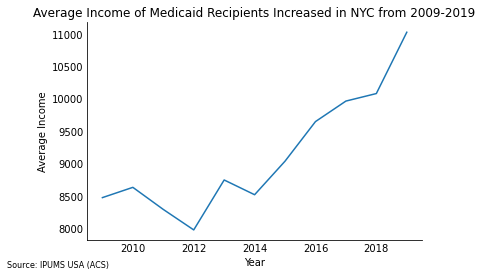

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
i = sns.lineplot(x='YEAR', y='AVGINC', data=year1)
i.ticklabel_format(style='plain', axis='both')
i.set(xlabel='Year', ylabel='Average Income', title='Average Income of Medicaid Recipients Increased in NYC from 2009-2019')
ax.tick_params(axis=u'both', which=u'both',length=0)
sns.despine()
plt.annotate('Source: IPUMS USA (ACS)', (0,0), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='top')
# plt.savefig('NYC Medicaid Population Average Income 2009-2019.png')

## Calculating Average Income by Year and Borough (County)

In [34]:
year_borough = df1.groupby(['YEAR', 'COUNTYICP'], as_index=False)

In [35]:
# Creating a column for average income
yr_br = calc.mean(year_borough, 'ADJINC').reset_index()
yr_br1 = yr_br.rename(columns={None: 'AVGINC'})

Plotting Average Income by Year and Borough

Text(-80, -20, 'Source: IPUMS USA (ACS)')

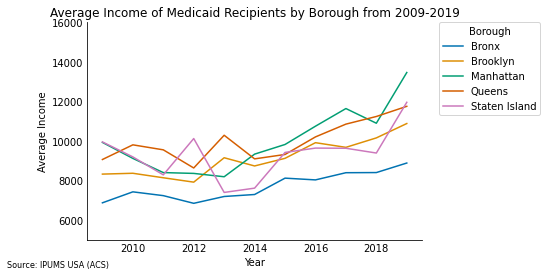

In [43]:
yr_br1 = yr_br1.replace([50, 470, 610, 810, 850], ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'])
fig = plt.figure()
ax = fig.add_subplot(111)
j = sns.lineplot(x='YEAR', y='AVGINC', hue='COUNTYICP', 
             data=yr_br1,  palette=sns.color_palette("colorblind", n_colors=5))
sns.despine()
j.set(xlabel='Year', ylabel='Average Income', title='Average Income of Medicaid Recipients by Borough from 2009-2019')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.ylim(5000, 16000)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Borough")
plt.annotate('Source: IPUMS USA (ACS)', (0,0), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='top')
# plt.savefig('Medicaid Population Average Income by Borough 2009-2019.png')

## Calculating Average Income Year, Borough (County), and PUMA (Public Use MicroData Areas)

In [45]:
puma = df1.groupby(['YEAR', 'COUNTYICP', 'PUMA'], as_index=False)

In [46]:
PUMA = calc.mean(puma, 'ADJINC').reset_index()
nyc_acs = PUMA.rename(columns={None: 'AVGINC'})
nyc_acs

,index,YEAR,COUNTYICP,PUMA,AVGINC
0,0,2009,50,3701,6500.892486
1,1,2009,50,3702,7248.356306
2,2,2009,50,3703,7497.819665
3,3,2009,50,3704,9175.762454
4,4,2009,50,3705,6375.228002
...,...,...,...,...,...
600,600,2019,810,4113,12475.184033
601,601,2019,810,4114,9253.712147
602,602,2019,850,3901,12711.289790
603,603,2019,850,3902,11763.709066


In [47]:
nyc_sorted = nyc_acs.sort_values(by=['YEAR', 'PUMA'])

# Plotting Average Income by Public Use Microdata Area Using Map Visualizations

## Loading the Shape File 

[Link to shape file](https://www.dropbox.com/sh/92g1w7tjiity76b/AADPMvZh_j-afWW2tL9CbEjja?dl=0) - download and unzip

In [60]:
# path to shape file 
path=''
# load the shape file using geopandas
geo = geopandas.read_file(path+'002ipums_puma_2010')

## Filter Shape File by State and PUMA

In [61]:
geo_ny = geo[geo['State'].str.contains('New York')]
geo_ny

,GISMATCH,GISJOIN,GEOID,STATEFIP,State,PUMA,Name,geometry
1754,3600200,G36000200,3600200,36,New York,00200,"Clinton, Franklin, Essex & Hamilton Counties PUMA","POLYGON ((1788883.762 971525.262, 1788855.569 ..."
1755,3602701,G36002701,3602701,36,New York,02701,Sullivan & Ulster (West) Counties PUMA,"POLYGON ((1785274.984 721789.832, 1786755.402 ..."
1756,3602702,G36002702,3602702,36,New York,02702,Ulster County (East) PUMA,"POLYGON ((1797341.583 722587.160, 1797345.789 ..."
1757,3602401,G36002401,3602401,36,New York,02401,Chemung (South) & Steuben (East) Counties--Gre...,"POLYGON ((1585190.990 681513.174, 1585550.866 ..."
1758,3602402,G36002402,3602402,36,New York,02402,"Steuben (North & West), Schuyler & Chemung (No...","POLYGON ((1583461.316 698344.475, 1583498.175 ..."
...,...,...,...,...,...,...,...,...
1894,3604113,G36004113,3604113,36,New York,04113,NYC-Queens Community District 10--Howard Beach...,"MULTIPOLYGON (((1839894.381 568619.343, 184007..."
1895,3604105,G36004105,3604105,36,New York,04105,NYC-Queens Community District 13--Queens Villa...,"POLYGON ((1850071.725 582540.241, 1850125.682 ..."
1896,3604104,G36004104,3604104,36,New York,04104,"NYC-Queens Community District 11--Bayside, Dou...","POLYGON ((1845681.605 584698.889, 1845720.329 ..."
1897,3604103,G36004103,3604103,36,New York,04103,"NYC-Queens Community District 7--Flushing, Mur...","POLYGON ((1844077.040 584102.979, 1844003.635 ..."


In [62]:
geo_nyc = geo_ny[geo_ny['Name'].str.contains('NYC')]
geo_nyc

,GISMATCH,GISJOIN,GEOID,STATEFIP,State,PUMA,Name,geometry
1759,3603810,G36003810,3603810,36,New York,03810,NYC-Manhattan Community District 1 & 2--Batter...,"MULTIPOLYGON (((1823808.440 568954.625, 182379..."
1760,3603807,G36003807,3603807,36,New York,03807,NYC-Manhattan Community District 4 & 5--Chelse...,"POLYGON ((1825753.088 579102.729, 1825796.020 ..."
1761,3603806,G36003806,3603806,36,New York,03806,NYC-Manhattan Community District 7--Upper West...,"POLYGON ((1827943.088 582810.176, 1827980.436 ..."
1762,3603802,G36003802,3603802,36,New York,03802,NYC-Manhattan Community District 9--Hamilton H...,"POLYGON ((1828642.709 586408.146, 1828692.595 ..."
1763,3603801,G36003801,3603801,36,New York,03801,NYC-Manhattan Community District 12--Washingto...,"MULTIPOLYGON (((1828941.161 591795.002, 182894..."
1764,3603803,G36003803,3603803,36,New York,03803,NYC-Manhattan Community District 10--Central H...,"POLYGON ((1829476.573 585349.807, 1829399.851 ..."
1765,3603809,G36003809,3603809,36,New York,03809,NYC-Manhattan Community District 3--Chinatown ...,"MULTIPOLYGON (((1827845.437 571805.204, 182801..."
1766,3603805,G36003805,3603805,36,New York,03805,NYC-Manhattan Community District 8--Upper East...,"MULTIPOLYGON (((1829090.984 577328.245, 182898..."
1767,3603804,G36003804,3603804,36,New York,03804,NYC-Manhattan Community District 11--East Harl...,"MULTIPOLYGON (((1831633.068 582698.078, 183148..."
1768,3603808,G36003808,3603808,36,New York,03808,NYC-Manhattan Community District 6--Murray Hil...,"POLYGON ((1829002.194 578178.863, 1828976.622 ..."


In [63]:
geo_nyc['PUMA'] = geo_nyc['PUMA'].apply(lambda x: int(str(x)[1:]))

/Users/Ariel/Desktop/NYU/Summer 2021/Policy and Data Studio/Repos/Ariel_Medex/env/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [64]:
geo_nyc

,GISMATCH,GISJOIN,GEOID,STATEFIP,State,PUMA,Name,geometry
1759,3603810,G36003810,3603810,36,New York,3810,NYC-Manhattan Community District 1 & 2--Batter...,"MULTIPOLYGON (((1823808.440 568954.625, 182379..."
1760,3603807,G36003807,3603807,36,New York,3807,NYC-Manhattan Community District 4 & 5--Chelse...,"POLYGON ((1825753.088 579102.729, 1825796.020 ..."
1761,3603806,G36003806,3603806,36,New York,3806,NYC-Manhattan Community District 7--Upper West...,"POLYGON ((1827943.088 582810.176, 1827980.436 ..."
1762,3603802,G36003802,3603802,36,New York,3802,NYC-Manhattan Community District 9--Hamilton H...,"POLYGON ((1828642.709 586408.146, 1828692.595 ..."
1763,3603801,G36003801,3603801,36,New York,3801,NYC-Manhattan Community District 12--Washingto...,"MULTIPOLYGON (((1828941.161 591795.002, 182894..."
1764,3603803,G36003803,3603803,36,New York,3803,NYC-Manhattan Community District 10--Central H...,"POLYGON ((1829476.573 585349.807, 1829399.851 ..."
1765,3603809,G36003809,3603809,36,New York,3809,NYC-Manhattan Community District 3--Chinatown ...,"MULTIPOLYGON (((1827845.437 571805.204, 182801..."
1766,3603805,G36003805,3603805,36,New York,3805,NYC-Manhattan Community District 8--Upper East...,"MULTIPOLYGON (((1829090.984 577328.245, 182898..."
1767,3603804,G36003804,3603804,36,New York,3804,NYC-Manhattan Community District 11--East Harl...,"MULTIPOLYGON (((1831633.068 582698.078, 183148..."
1768,3603808,G36003808,3603808,36,New York,3808,NYC-Manhattan Community District 6--Murray Hil...,"POLYGON ((1829002.194 578178.863, 1828976.622 ..."


Recode PUMA Column to standardize with nyc_sorted dataframe

In [65]:
gnyc_sorted = geo_nyc.sort_values(by=['PUMA'])

## Merge Shape file with dataframe

In [66]:
gnyc_1 = pd.merge(gnyc_sorted, nyc_sorted, how='inner', on = 'PUMA')

## Create a for loop to plot maps and export

In [73]:
# save all the maps in the charts folder
output_path = 'charts/maps/'

# counter for the for loop
i = 0

list_of_years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
# set the min and max range for the choropleth map
vmin, vmax = 7000, 27000

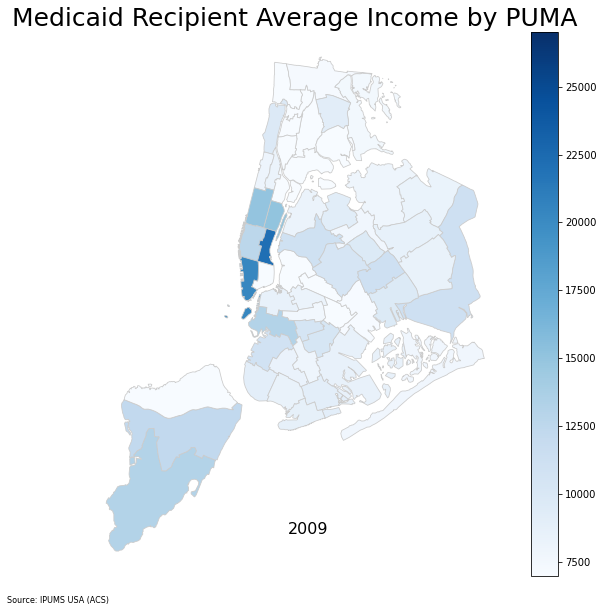

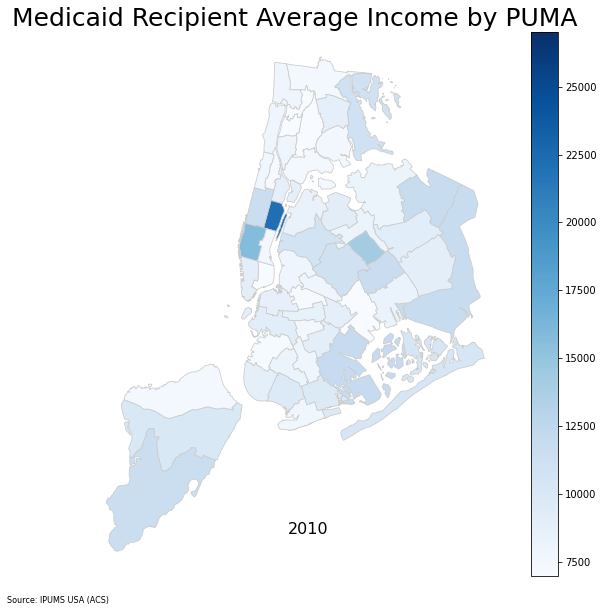

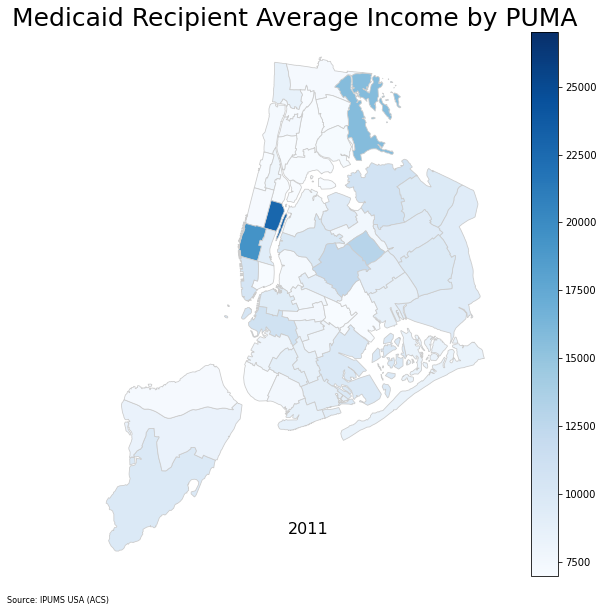

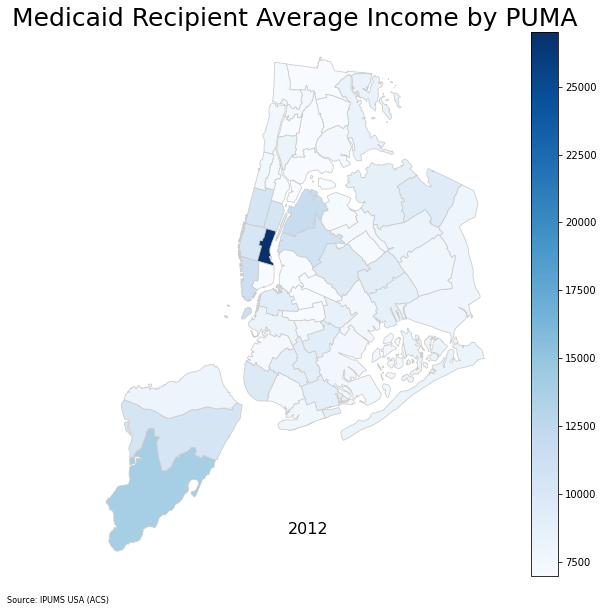

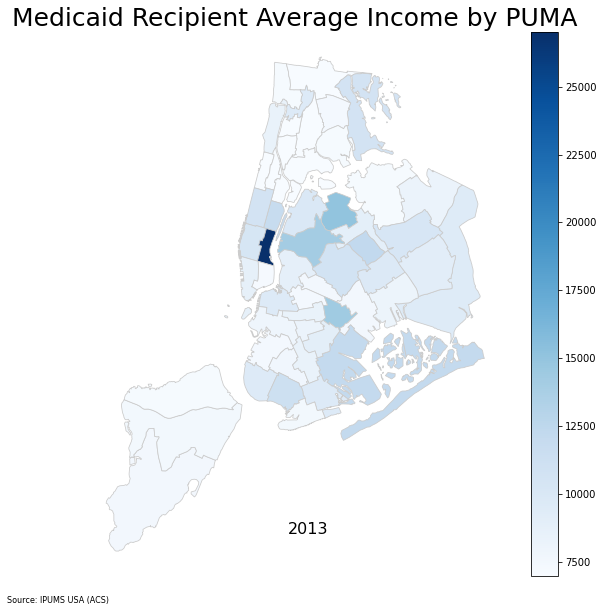

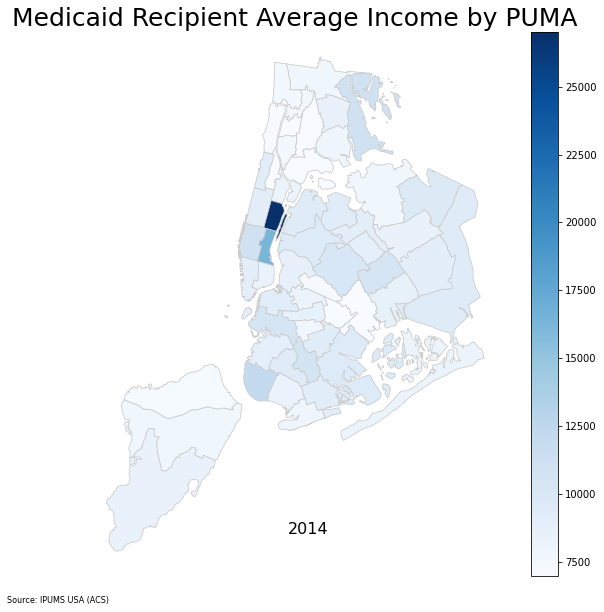

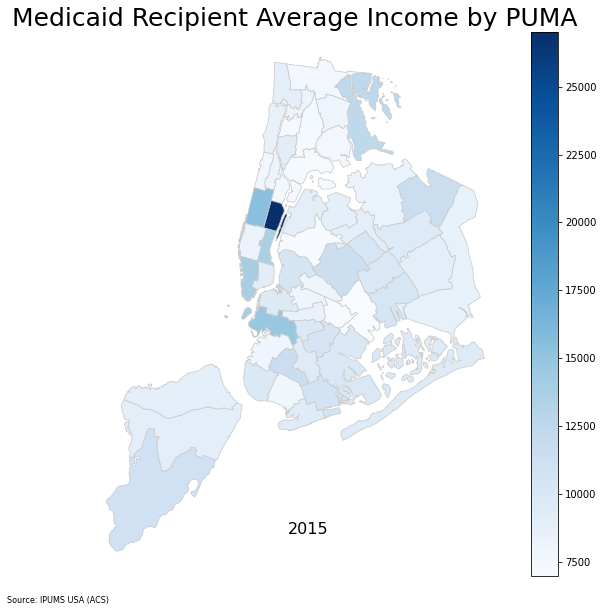

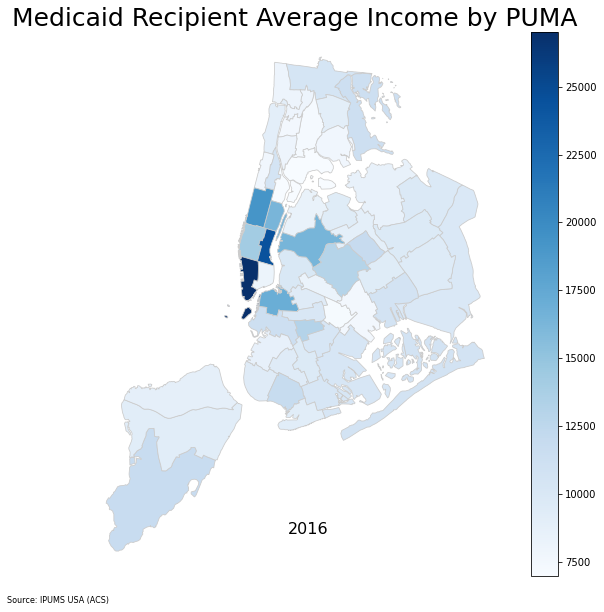

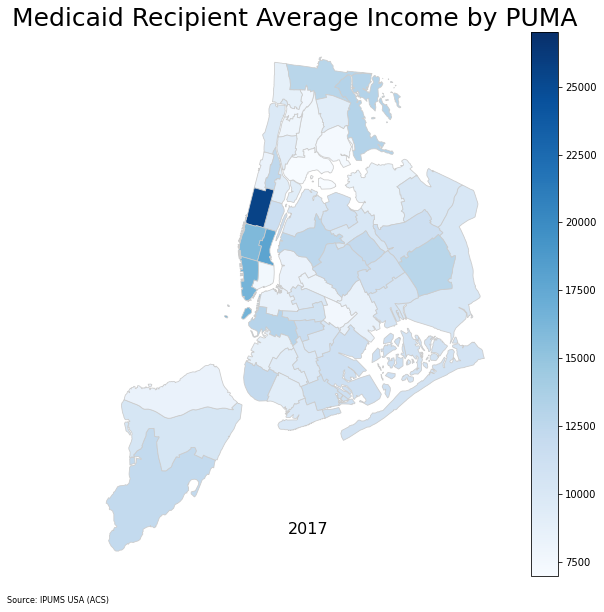

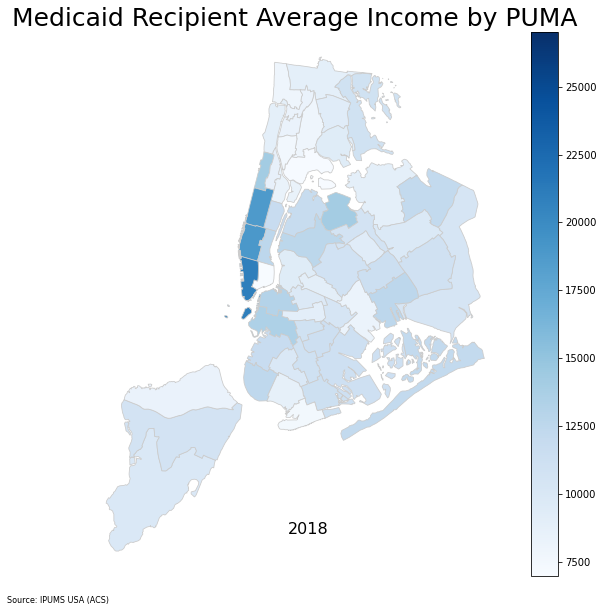

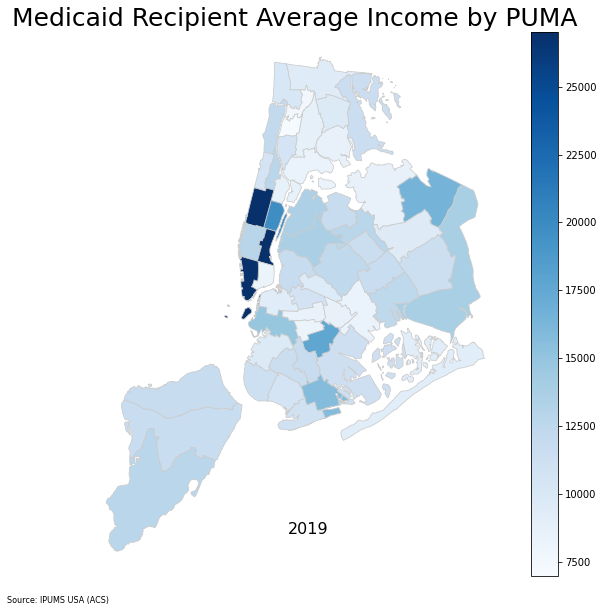

In [74]:
# start the for loop to create one map per year
for year in list_of_years:
    
    df_single_year = gnyc_1[gnyc_1["YEAR"] == year]
    
    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    fig = df_single_year.plot(column='AVGINC', cmap='Blues', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax,
legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
    # remove axis of chart
    fig.axis('off')
    
    # add a title
    fig.set_title('Medicaid Recipient Average Income by PUMA', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'}) 
    
    # create an annotation for the year by grabbing the first 4 digits
    only_year = str(year)
    # position the annotation to the bottom left
    fig.annotate(only_year,
            xy=(0.4, .125), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=16)
    fig.annotate('Source: IPUMS USA (ACS)', (0,0), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='top')
    
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join(output_path, only_year+'_avginc.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)

## Calculating Average %FPL (Federal Poverty Limit)  by Year

In [83]:
year_pov = df1.groupby(['YEAR'], as_index=False)

In [84]:
Year_pov = calc.mean(year_pov, 'POVERTY').reset_index()
yfpl = Year_pov.rename(columns={None: 'AVGFPL'})

Plotting Average FPL by Year

Text(-80, -20, 'Source: IPUMS USA (ACS)')

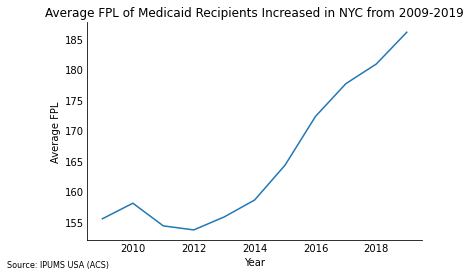

In [86]:
fig = plt.figure()
ax = fig.add_subplot(111)
i = sns.lineplot(x='YEAR', y='AVGFPL', data=yfpl)
i.ticklabel_format(style='plain', axis='both')
i.set(xlabel='Year', ylabel='Average FPL', title='Average Percent FPL of Medicaid Recipients Increased in NYC from 2009-2019')
ax.tick_params(axis=u'both', which=u'both',length=0)
sns.despine()
plt.annotate('Source: IPUMS USA (ACS)', (0,0), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='top')
# plt.savefig('NYC Medicaid Population Average Income 2009-2019.png')

In [87]:
avg_fpl = calc.mean(df1, 'POVERTY') #calculation for the average income of the entire dataset
avg_fpl

165.99652789951764

## Calculating Average FPL by Year and Borough (County)

In [88]:
year_borough = df1.groupby(['YEAR', 'COUNTYICP'], as_index=False)

In [89]:
# Creating a column for average FPL
yr_brf = calc.mean(year_borough, 'POVERTY').reset_index()
yr_brfpl = yr_brf.rename(columns={None: 'AVGFPL'})

Plotting Average Percent FPL by Year and Borough

Text(-80, -20, 'Source: IPUMS USA (ACS)')

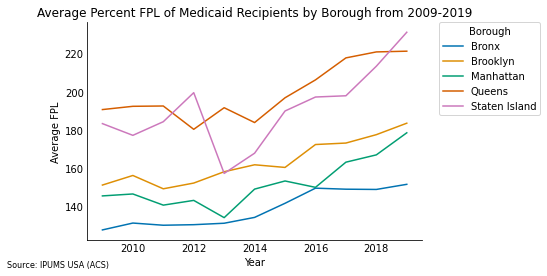

In [93]:
yr_brfpl = yr_brfpl.replace([50, 470, 610, 810, 850], ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'])
fig = plt.figure()
ax = fig.add_subplot(111)
j = sns.lineplot(x='YEAR', y='AVGFPL', hue='COUNTYICP', 
             data=yr_brfpl,  palette=sns.color_palette("colorblind", n_colors=5))
sns.despine()
j.set(xlabel='Year', ylabel='Average FPL', title='Average Percent FPL of Medicaid Recipients by Borough from 2009-2019')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Borough")
plt.annotate('Source: IPUMS USA (ACS)', (0,0), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='top')
# plt.savefig('Medicaid Population Average Income by Borough 2009-2019.png')

## Calculating Average Percent FPL by Year, Borough (County), and PUMA (Public Use MicroData Areas)

In [94]:
puma = df1.groupby(['YEAR', 'COUNTYICP', 'PUMA'], as_index=False)

In [95]:
PUMAF = calc.mean(puma, 'POVERTY').reset_index()
nyc_fpl = PUMAF.rename(columns={None: 'AVGFPL'})

In [96]:
fpl_sorted = nyc_fpl.sort_values(by=['YEAR', 'PUMA'])

# Plotting Average Percent FPL by Public Use Microdata Area Using Map Visualizations

In [97]:
fnyc_1 = pd.merge(gnyc_sorted, fpl_sorted, how='inner', on = 'PUMA') #merge sorted shape file with sorted fpl dataframe

In [98]:
# save all the maps in the charts folder
output_path = 'charts/maps/'

# counter for the for loop
i = 0

list_of_years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
# set the min and max range for the choropleth map
vmin, vmax = 1, 300

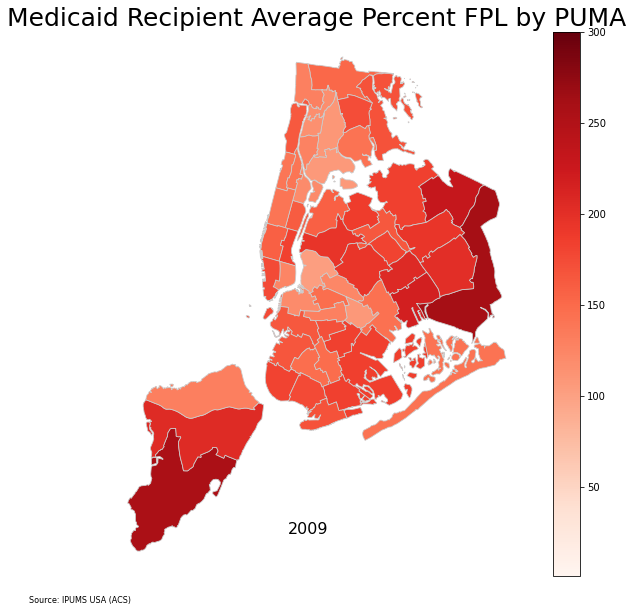

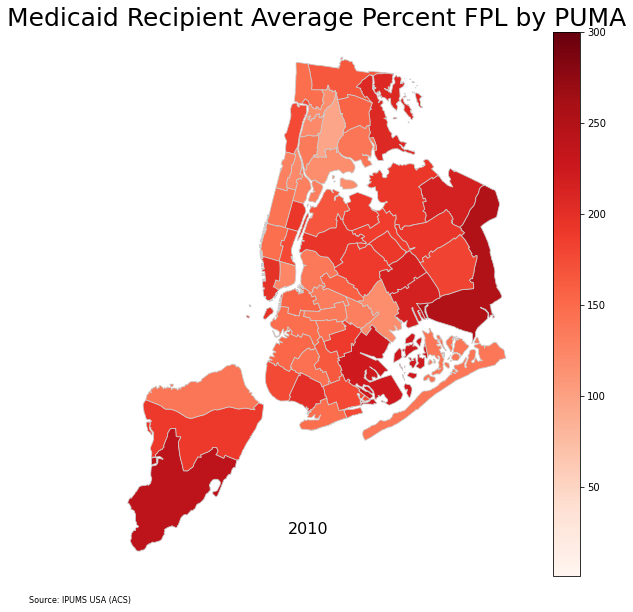

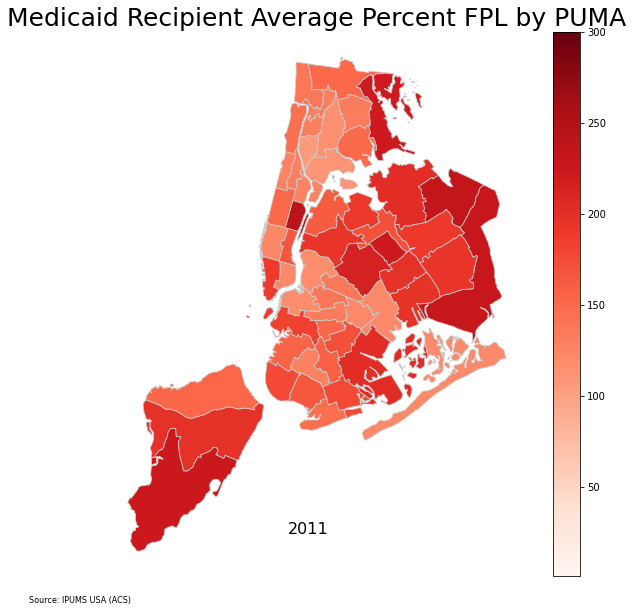

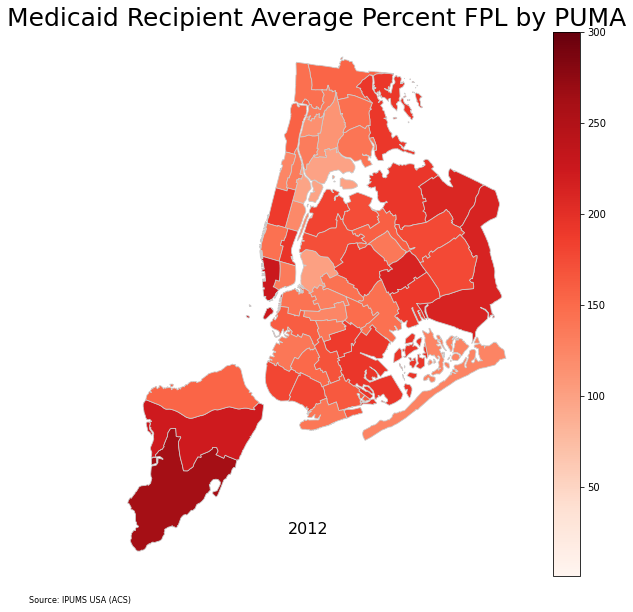

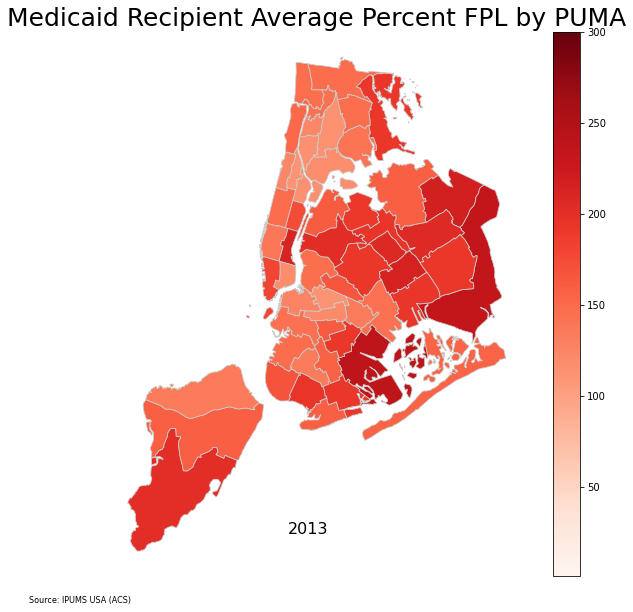

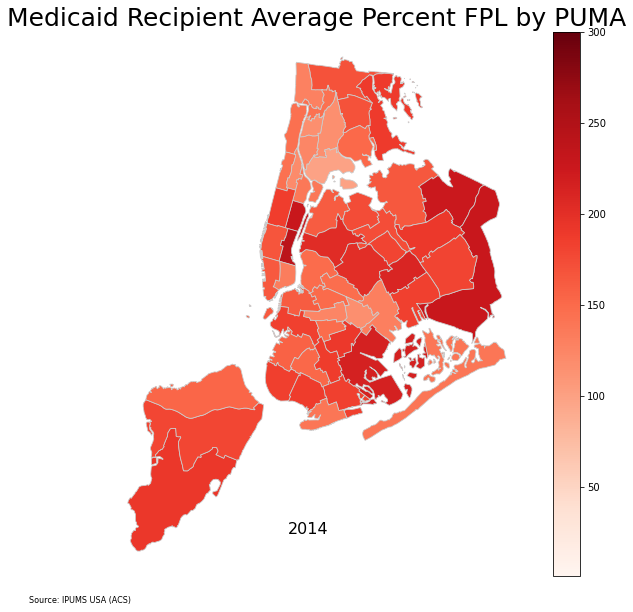

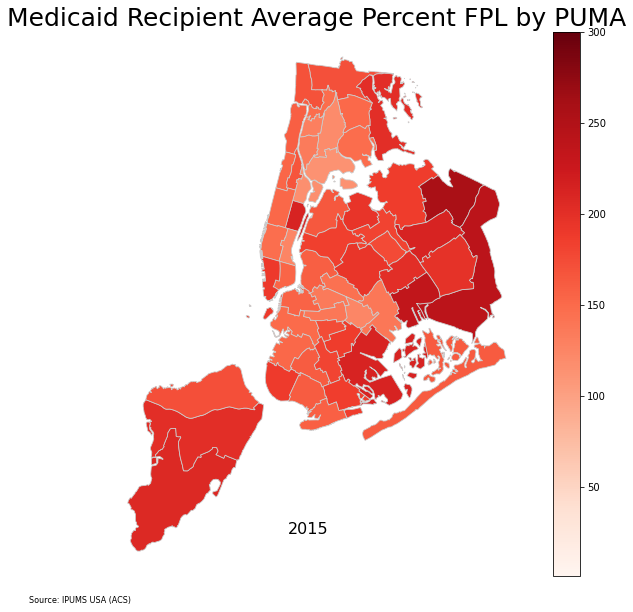

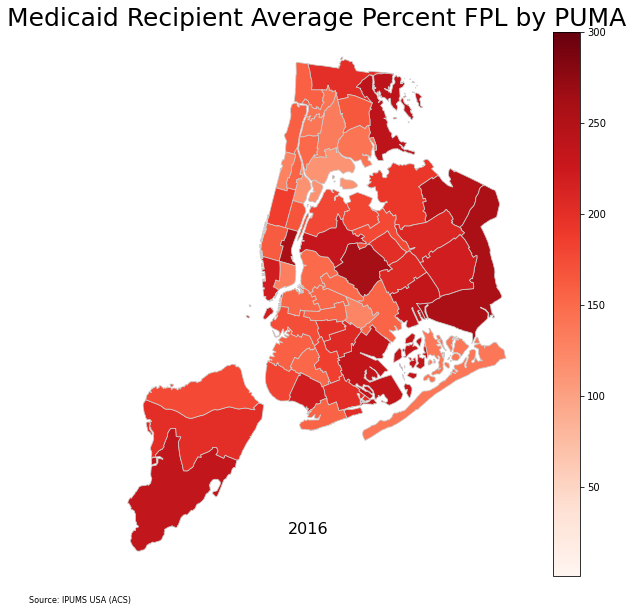

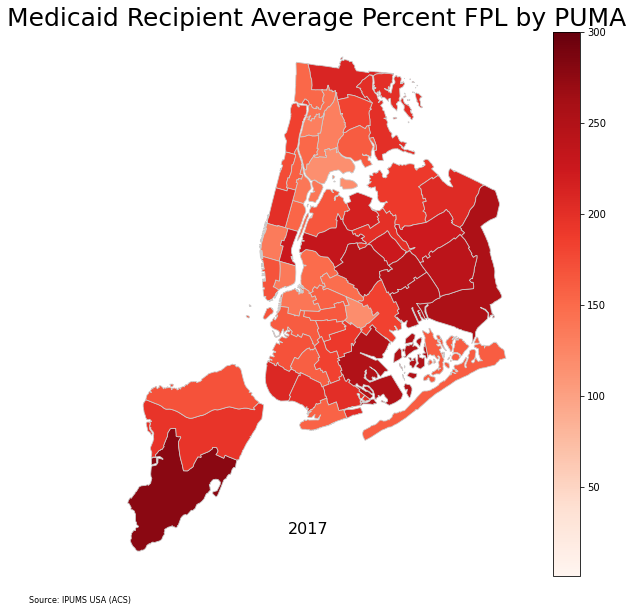

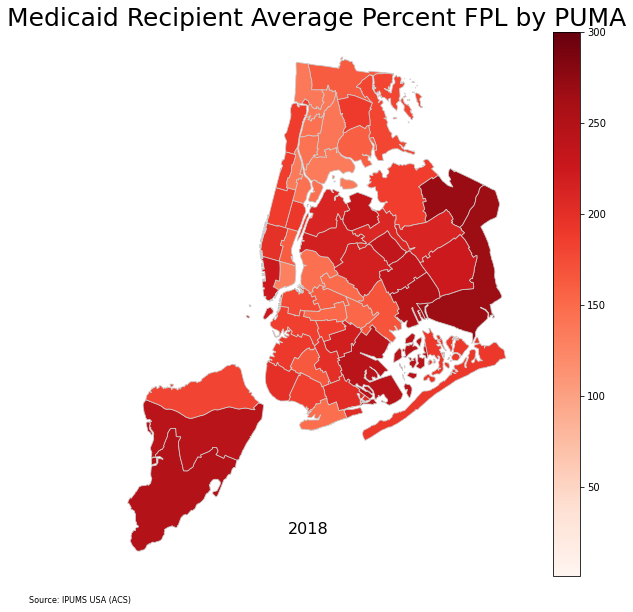

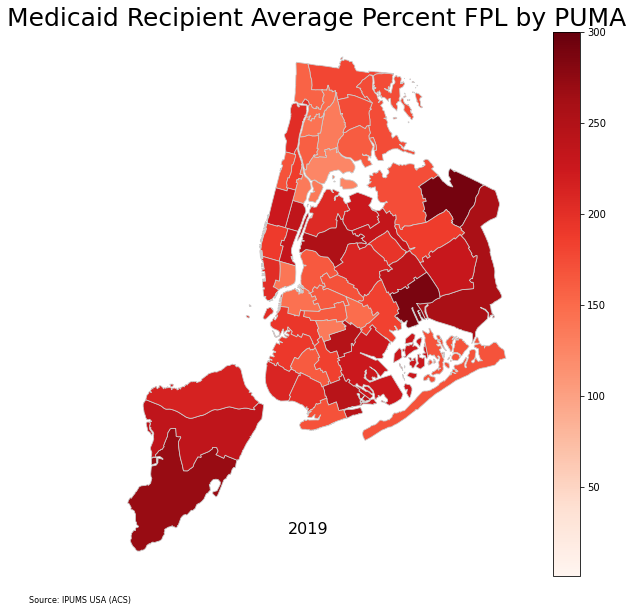

In [100]:
# start the for loop to create one map per year
for year in list_of_years:
    
    df_single_yearf = fnyc_1[fnyc_1["YEAR"] == year]
    
    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    fig = df_single_yearf.plot(column='AVGFPL', cmap='Reds', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax,
legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
    # remove axis of chart
    fig.axis('off')
    
    # add a title
    fig.set_title('Medicaid Recipient Average Percent FPL by PUMA', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'}) 
    
    # create an annotation for the year by grabbing the first 4 digits
    only_year = str(year)
    # position the annotation to the bottom left
    fig.annotate(only_year,
            xy=(0.4, .125), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=16)
    fig.annotate('Source: IPUMS USA (ACS)', (0,0), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='top')
    
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join(output_path, only_year+'_avgfpl.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)